# Pretty Visitors 

## Data Science - Sprint 3

### Variáveis:
• Diabetes_012: 0 = sem diabetes 1 = pré-diabetes 2 = diabetes

• HighBP: 0 = sem pressão alta 1 = pressão alta

• HighChol: 0 = sem colesterol alto 1 = colesterol alto

• CholCheck: 0 = não fez verificação de colesterol nos últimos 5 anos 1 = fez verificação de
colesterol nos últimos 5 anos

• BMI: Índice de Massa Corporal

• Smoker: Você já fumou pelomenos 100 cigarros em toda a sua vida? [Nota: 5 maços = 100
cigarros] 0 = não 1 = sim

• Stroke: (Alguma vez lhe disseram que) você teve um derrame. 0 = não 1 = sim

• HeartDiseaseorAttack: Doença cardíaca coronariana (DCC) ou infarto do miocárdio (IM)
0 = não 1 = sim

• PhysActivity: Atividade física nos últimos 30 dias - excluindo trabalho 0 = não 1 = sim

• Fruits: Consumo de frutas 1 ou mais vezes por dia 0 = não 1 = sim

• Veggies: Consumo de vegetais 1 ou mais vezes por dia 0 = não 1 = sim

• HvyAlcoholConsump: Bebedores excessivos (homens adultos que consomem mais de 14
bebidas por semana e mulheres adultas que consomem mais de 7 bebidas por semana) 0 =
não 1 = sim

• AnyHealthcare: Possui algum tipo de cobertura de saúde, incluindo seguro de saúde,
planos pré-pagos como HMO, etc. 0 = não 1 = sim

• NoDocbcCost: Houve algum momento nos últimos 12 meses em que você precisou
consultar um médico, mas não pôde devido ao custo? 0 = não 1 = sim

• GenHlth: Você diria que, em geral, sua saúde é: escala de 1 a 5 -x- 1 = excelente 2 = muito boa
3 = boa 4 = regular 5 = ruim

• MentHlth: Agora pensando sobre sua saúde mental, que inclui estresse, depressão e
problemas emocionais, por quantos dias nos últimos 30 dias sua saúde mental não esteve
boa? escala de 1 a 30 dias

• PhysHlth: Agora pensando sobre sua saúde física, que inclui doença física e lesões, por
quantos dias nos últimos 30 dias sua saúde física não esteve boa? escala de 1 a 30 dias

• DiffWalk: Você tem grande dificuldade para caminhar ou subir escadas? 0 = não 1 = sim

• Sex: 0 = feminino 1 = masculino

• Age: Categoria de idade em 13 níveis (_AGEG5YR ver código) 1 = 18-24 9 = 60-64 13 =
80 anos ou mais

• Education: Nível de educação escala de 1 a 6 1 = Nunca frequentou a escola ou apenas
jardim de infância 2 = Da 1ª à 8ª série (Ensino Fundamental) 3 = Da 9ª à 11ª série (Algum
Ensino Médio) 4 = 12ª série ou GED (Ensino Médio completo) 5 = Faculdade de 1 a 3 anos
(Alguma faculdade ou escola técnica) 6 = Faculdade de 4 anos ou mais (Graduado)

• Income: Escala de renda escala de 1 a 8 

1 = menos de $10,000 

5 = menos de $35,000 

8 = $75,000 ou mais

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, f_oneway
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("Diabetes.csv")

# Limpeza inicial do dataset

In [3]:
null_counts = df.isnull().sum()
null_counts

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [4]:
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [5]:
duplicate_count = df.duplicated().sum()

print(duplicate_count)

23899


In [6]:
duplicates = df[df.duplicated()]

duplicates

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,2.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,2.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,6.0
253550,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
253563,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
253597,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0


In [7]:
df.drop_duplicates()

df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [8]:
# For a specific column
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Get rows with outliers
df_cleaned = df[(df['BMI'] >= lower_bound) & (df['BMI'] <= upper_bound)]

df_cleaned

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253674,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [9]:
df.max()

Diabetes_012             2.0
HighBP                   1.0
HighChol                 1.0
CholCheck                1.0
BMI                     98.0
Smoker                   1.0
Stroke                   1.0
HeartDiseaseorAttack     1.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        1.0
AnyHealthcare            1.0
NoDocbcCost              1.0
GenHlth                  5.0
MentHlth                30.0
PhysHlth                30.0
DiffWalk                 1.0
Sex                      1.0
Age                     13.0
Education                6.0
Income                   8.0
dtype: float64

In [10]:
# Para a coluna 'MentHlth'
Q1_ment = df['MentHlth'].quantile(0.25)
Q3_ment = df['MentHlth'].quantile(0.75)
IQR_ment = Q3_ment - Q1_ment

# Limites para outliers
lower_bound_ment = Q1_ment - 1.5 * IQR_ment
upper_bound_ment = Q3_ment + 1.5 * IQR_ment

# Para a coluna 'PhysHlth'
Q1_phys = df['PhysHlth'].quantile(0.25)
Q3_phys = df['PhysHlth'].quantile(0.75)
IQR_phys = Q3_phys - Q1_phys

# Limites para outliers
lower_bound_phys = Q1_phys - 1.5 * IQR_phys
upper_bound_phys = Q3_phys + 1.5 * IQR_phys

# Filtrar os dados, mantendo apenas os valores dentro dos limites (sem outliers)
df_cleaned = df[
    (df['MentHlth'] >= lower_bound_ment) & (df['MentHlth'] <= upper_bound_ment) &
    (df['PhysHlth'] >= lower_bound_phys) & (df['PhysHlth'] <= upper_bound_phys)
]

# Exibir o DataFrame limpo
df_cleaned

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


# Estatisticas Descritivas das Variáveis

Media de cada uma das variáveis

In [11]:
df_cleaned.mean()

Diabetes_012             0.243049
HighBP                   0.394966
HighChol                 0.397052
CholCheck                0.961298
BMI                     27.952142
Smoker                   0.411409
Stroke                   0.027981
HeartDiseaseorAttack     0.071859
PhysActivity             0.801422
Fruits                   0.650962
Veggies                  0.825351
HvyAlcoholConsump        0.055634
AnyHealthcare            0.955352
NoDocbcCost              0.055999
GenHlth                  2.242029
MentHlth                 0.502505
PhysHlth                 0.690263
DiffWalk                 0.087886
Sex                      0.461748
Age                      8.019845
Education                5.129481
Income                   6.351415
dtype: float64

Mediana de cada uma das variáveis

In [12]:
df_cleaned.median()

Diabetes_012             0.0
HighBP                   0.0
HighChol                 0.0
CholCheck                1.0
BMI                     27.0
Smoker                   0.0
Stroke                   0.0
HeartDiseaseorAttack     0.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        0.0
AnyHealthcare            1.0
NoDocbcCost              0.0
GenHlth                  2.0
MentHlth                 0.0
PhysHlth                 0.0
DiffWalk                 0.0
Sex                      0.0
Age                      8.0
Education                5.0
Income                   7.0
dtype: float64

A moda de cada uma das variáveis

In [13]:
df_cleaned.mode()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,8.0


Desvio Padrão de cada uma das variáveis

In [14]:
df_cleaned.std()

Diabetes_012            0.641255
HighBP                  0.488845
HighChol                0.489288
CholCheck               0.192885
BMI                     6.169581
Smoker                  0.492090
Stroke                  0.164919
HeartDiseaseorAttack    0.258255
PhysActivity            0.398930
Fruits                  0.476667
Veggies                 0.379668
HvyAlcoholConsump       0.229215
AnyHealthcare           0.206530
NoDocbcCost             0.229920
GenHlth                 0.891332
MentHlth                1.217272
PhysHlth                1.533568
DiffWalk                0.283130
Sex                     0.498536
Age                     3.066862
Education               0.956296
Income                  1.899177
dtype: float64

Variancia de cada uma das variáveis

In [15]:
df_cleaned.var()

Diabetes_012             0.411208
HighBP                   0.238969
HighChol                 0.239403
CholCheck                0.037205
BMI                     38.063733
Smoker                   0.242153
Stroke                   0.027198
HeartDiseaseorAttack     0.066696
PhysActivity             0.159145
Fruits                   0.227212
Veggies                  0.144147
HvyAlcoholConsump        0.052540
AnyHealthcare            0.042655
NoDocbcCost              0.052863
GenHlth                  0.794472
MentHlth                 1.481752
PhysHlth                 2.351830
DiffWalk                 0.080163
Sex                      0.248538
Age                      9.405644
Education                0.914501
Income                   3.606875
dtype: float64

Amplitude de cada uma das variáveis

In [16]:
df_cleaned.max() - df_cleaned.min()

Diabetes_012             2.0
HighBP                   1.0
HighChol                 1.0
CholCheck                1.0
BMI                     86.0
Smoker                   1.0
Stroke                   1.0
HeartDiseaseorAttack     1.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        1.0
AnyHealthcare            1.0
NoDocbcCost              1.0
GenHlth                  4.0
MentHlth                 5.0
PhysHlth                 7.0
DiffWalk                 1.0
Sex                      1.0
Age                     12.0
Education                5.0
Income                   7.0
dtype: float64

Através do comando describe do pandas é possível visualizar de uma vez só a média, desvio padrão, os 3 quartils (já que o quarto quartil são todos os números acima do Q3); temos o máximo e o mínimo também

In [17]:
data = df_cleaned
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,192237.000000,192237.000000,192237.000000,192237.000000,192237.000000,192237.000000,192237.000000,192237.000000,192237.000000,192237.000000,...,192237.000000,192237.000000,192237.000000,192237.000000,192237.000000,192237.000000,192237.000000,192237.000000,192237.000000,192237.000000
mean,0.243049,0.394966,0.397052,0.961298,27.952142,0.411409,0.027981,0.071859,0.801422,0.650962,...,0.955352,0.055999,2.242029,0.502505,0.690263,0.087886,0.461748,8.019845,5.129481,6.351415
std,0.641255,0.488845,0.489288,0.192885,6.169581,0.492090,0.164919,0.258255,0.398930,0.476667,...,0.206530,0.229920,0.891332,1.217272,1.533568,0.283130,0.498536,3.066862,0.956296,1.899177
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,5.000000,7.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [18]:
data['Diabetes_012'] = data['Diabetes_012'].apply(np.int64)
display(data.dtypes)

C:\Users\ggdal\AppData\Local\Temp\ipykernel_38156\2121339253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Diabetes_012'] = data['Diabetes_012'].apply(np.int64)


Diabetes_012              int64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [19]:
# Converter as colunas para o tipo 'object' antes de fazer a substituição
data['Smoker'] = data['Smoker'].astype(object)
data['HvyAlcoholConsump'] = data['HvyAlcoholConsump'].astype(object)
data['AnyHealthcare'] = data['AnyHealthcare'].astype(object)

# Substituir os valores float por strings
data['Smoker'] = data['Smoker'].replace({0.0: 'no', 1.0: 'yes'})
data['HvyAlcoholConsump'] = data['HvyAlcoholConsump'].replace({0.0: 'no', 1.0: 'yes'})
data['AnyHealthcare'] = data['AnyHealthcare'].replace({0.0: 'no', 1.0:'yes'})

data['Diabetes_012'] = data['Diabetes_012'].apply(np.int64)
display(data.dtypes)

C:\Users\ggdal\AppData\Local\Temp\ipykernel_38156\1876916979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Smoker'] = data['Smoker'].astype(object)
C:\Users\ggdal\AppData\Local\Temp\ipykernel_38156\1876916979.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['HvyAlcoholConsump'] = data['HvyAlcoholConsump'].astype(object)
C:\Users\ggdal\AppData\Local\Temp\ipykernel_38156\1876916979.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

Diabetes_012              int64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                   object
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump        object
AnyHealthcare            object
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

# Análises focadas em gráficos

Para contextualizar, todos os gráficos a setguir seguem o seguinte método para calcular seus eixos:
(Usarei os exemplos do gráfico 5)
Cálculo da Média: Onde A variável do eixo y (exemplo: No Doctor Due to Cost) é binária (0 ou 1). 
Para cada faixa do eixo x (Exemplo: Income), o seaborn calcula a média de y para os diferentes grupos de diabetes. 
Por exemplo, se em uma faixa de renda específica, 30% das pessoas relataram que não puderam consultar um médico devido ao custo (1), a média seria 0.3.

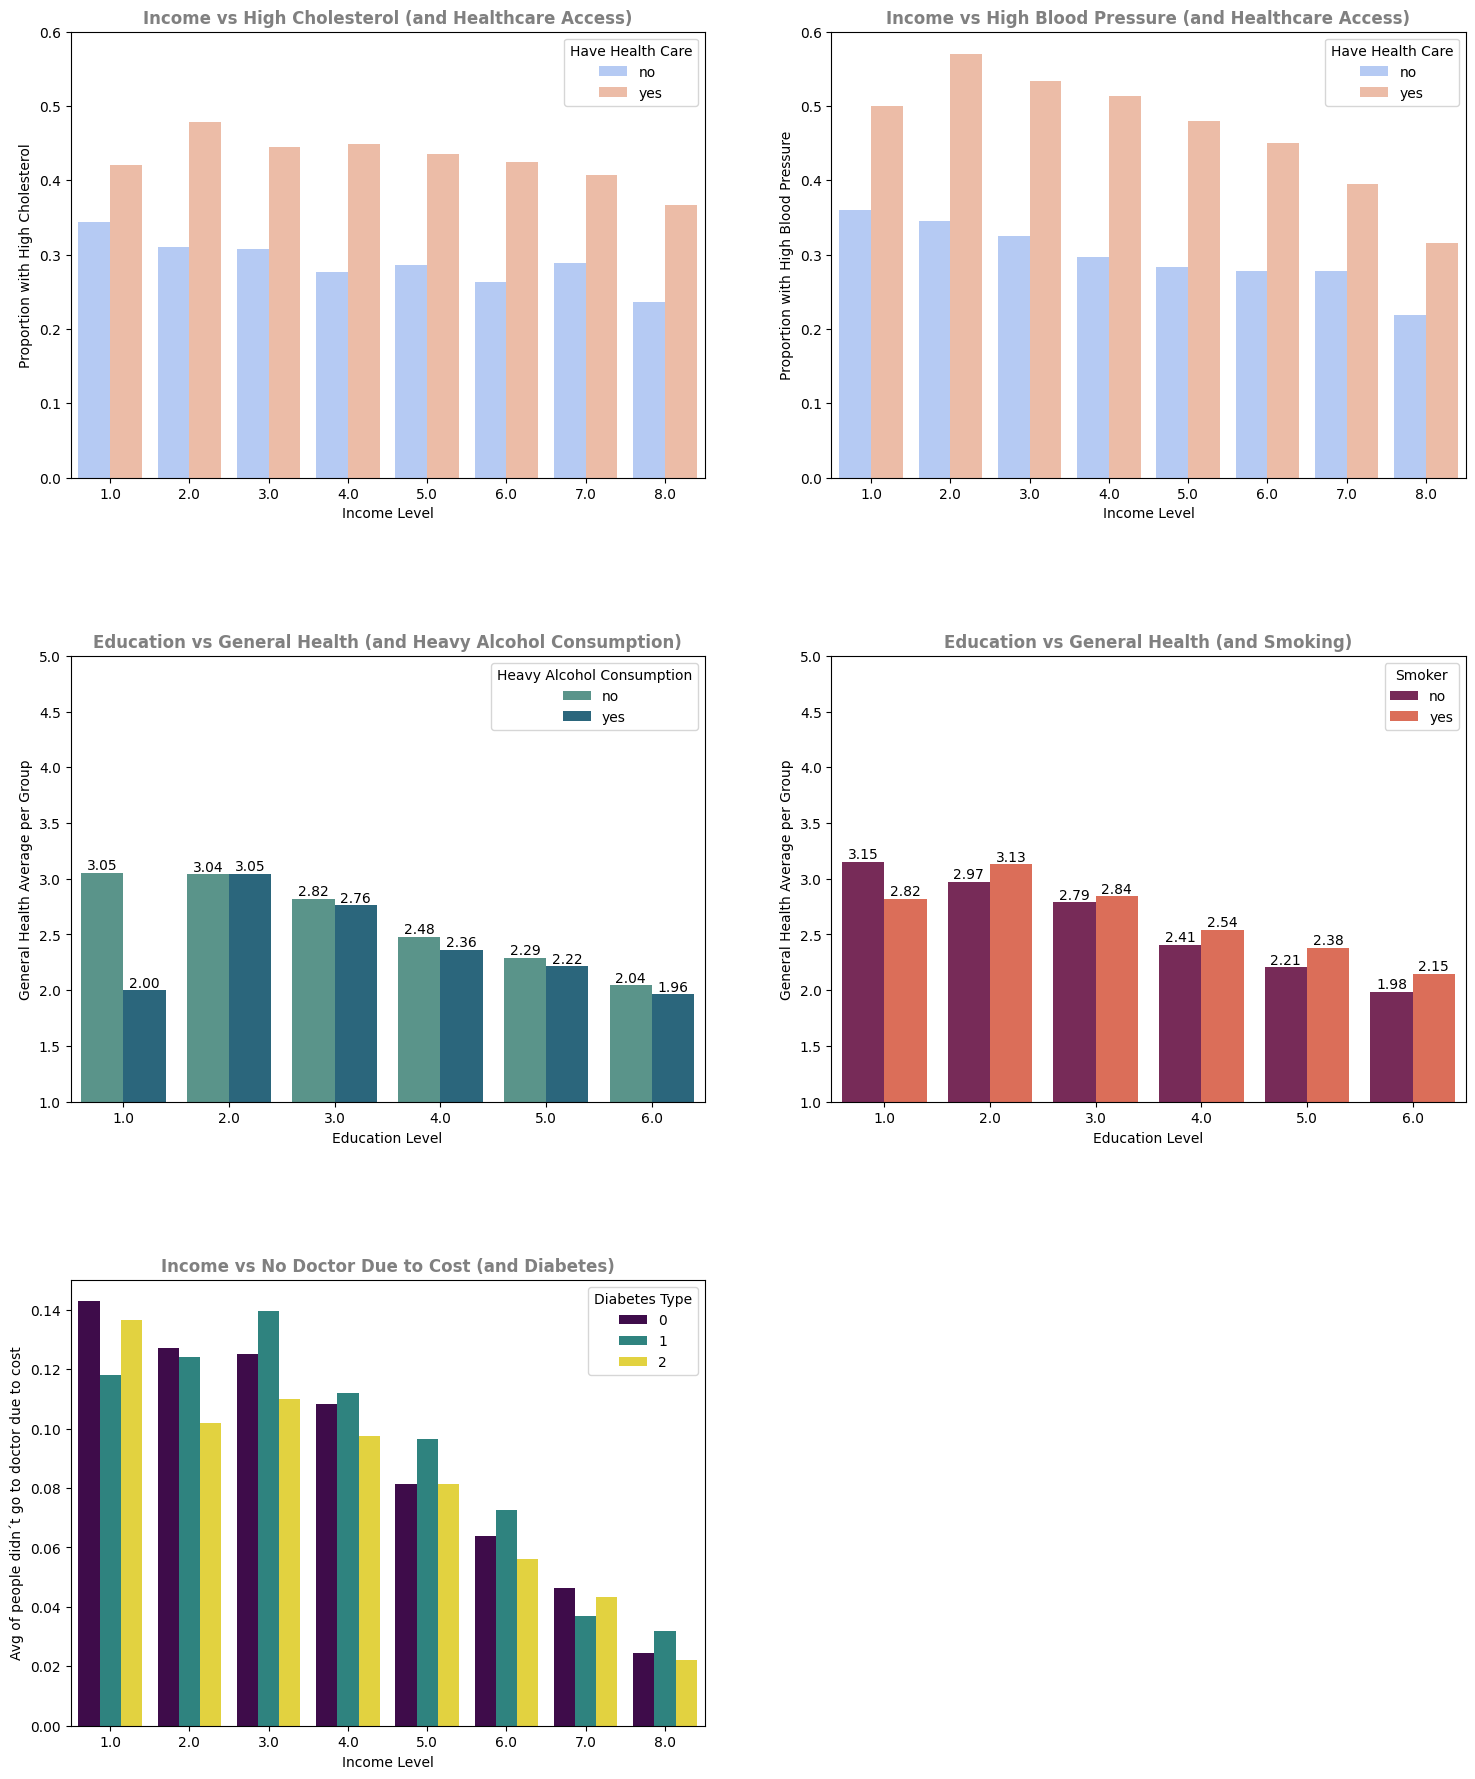

In [20]:
# Perguntar para o professor se as error bars são úteis mesmo

data = df_cleaned
# Set up a new grid of subplots for more socioeconomically-focused analysis
f, ax = plt.subplots(3, 2, figsize=(18, 22))
f.delaxes(ax[2,1])  # Removing the last subplot to have an empty space

plt.subplots_adjust(hspace=0.4)

y_min = 0  # Defina um valor mínimo apropriado
y_max = 0.6  # Se a proporção varia de 0 a 1

ax[0, 0].set_ylim(y_min, y_max)
ax[0, 1].set_ylim(y_min, y_max)

y_min_2 = 0
y_max_2 = 4

ax[1, 0].set_ylim(y_min_2, y_max_2)
ax[1, 1].set_ylim(y_min_2, y_max_2)



def anota(xa,ya):
    for p in ax[xa, ya].patches:
        ax[xa, ya].annotate(f'{p.get_height():.2f}', 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha='center', va='bottom', fontsize=10)

    # Ajustando limites do eixo y
    ax[xa, ya].set_ylim(1, 5)


# Plot 1: Healthcare Access vs Income and High Cholesterol
sns.barplot(x='Income', y='HighChol', hue='AnyHealthcare', palette='coolwarm', data=data, ax=ax[0, 0], errorbar=None)
ax[0, 0].set_title('Income vs High Cholesterol (and Healthcare Access)', fontdict={'size': 12, 'weight': 'bold', 'color': 'grey'})
ax[0, 0].set_xlabel('Income Level')
ax[0, 0].set_ylabel('Proportion with High Cholesterol')
ax[0, 0].legend(title='Have Health Care')


# Plot 2: Healthcare Access vs Income and High Blood Pressure
sns.barplot(x='Income', y='HighBP', hue='AnyHealthcare', palette='coolwarm', data=data, ax=ax[0, 1], errorbar=None)
ax[0, 1].set_title('Income vs High Blood Pressure (and Healthcare Access)', fontdict={'size': 12, 'weight': 'bold', 'color': 'grey'})
ax[0, 1].set_xlabel('Income Level')
ax[0, 1].set_ylabel('Proportion with High Blood Pressure')
ax[0, 1].legend(title='Have Health Care')


# Plot 3: Education vs General Health (and Heavy Alcohol Consumption)
sns.barplot(x='Education', y='GenHlth', hue='HvyAlcoholConsump',  palette='crest', data=data, ax=ax[1, 0], errorbar=None)
ax[1, 0].set_title('Education vs General Health (and Heavy Alcohol Consumption)', fontdict={'size': 12, 'weight': 'bold', 'color': 'grey'})
ax[1, 0].set_xlabel('Education Level')
ax[1, 0].set_ylabel('General Health Average per Group')
ax[1, 0].legend(title='Heavy Alcohol Consumption')
anota(1,0)

# Plot 4: Education vs General Health (and Smoking)
sns.barplot(x='Education', y='GenHlth', hue='Smoker', palette='rocket', data=data, ax=ax[1, 1], errorbar=None)
ax[1, 1].set_title('Education vs General Health (and Smoking)', fontdict={'size': 12, 'weight': 'bold', 'color': 'grey'})
ax[1, 1].set_xlabel('Education Level')
ax[1, 1].set_ylabel('General Health Average per Group')
anota(1,1)

# Plot 5: No Doctor Due to Cost vs Income, and Diabetes/Heart Disease Prevalence
min_value = data['NoDocbcCost'].min()
max_value = data['NoDocbcCost'].max()

# Aplicar a transformação

sns.barplot(x='Income', y='NoDocbcCost', hue='Diabetes_012', palette='viridis', data=data, ax=ax[2, 0], errorbar=None)
ax[2, 0].set_title('Income vs No Doctor Due to Cost (and Diabetes)', fontdict={'size': 12, 'weight': 'bold', 'color': 'grey'})
ax[2, 0].set_xlabel('Income Level')
ax[2, 0].set_ylabel('Avg of people didn´t go to doctor due to cost')
ax[2, 0].legend(title='Diabetes Type')

plt.show()

# Matriz de Correlação

### Matriz de Correlação para Variáveis Contínuas
Utilizaremos o coeficiente de correlação de Pearson para avaliar as relações entre as variáveis contínuas, como BMI (IMC), MentHlth, PhysHlth, e a variável de idade (convertida para numérica). 

Isso nos permitirá ver quais dessas variáveis se correlacionam mais fortemente com o estado de diabetes ou outros fatores de saúde.

<Axes: >

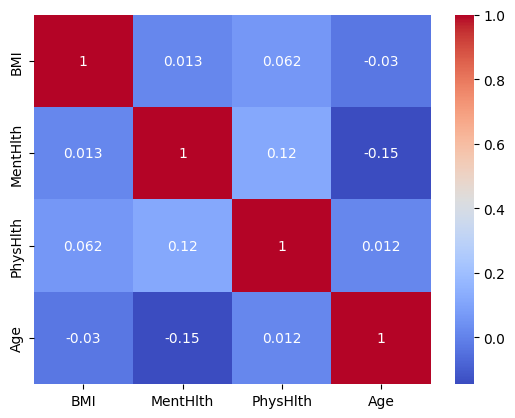

In [21]:
# Seleção de variáveis contínuas
cont_vars = ['BMI', 'MentHlth', 'PhysHlth', 'Age']
correlation_matrix = data[cont_vars].corr(method='pearson')

# Visualizando a matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


### Correlação de Spearman para Variáveis Categóricas
Como muitas variáveis são categóricas (por exemplo, Diabetes_012, HighBP, HighChol, etc.), utilizaremos a correlação de Spearman para essas variáveis. 

Esta abordagem ajudará a avaliar a relação entre diferentes condições de saúde.

In [24]:
# Seleção de variáveis categóricas para correlação de Spearman
cat_vars = ['Diabetes_012', 'HighBP', 'HighChol', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity']

# Calculando correlação de Spearman
correlation_matrix_spearman = df_cleaned[cat_vars].corr(method='spearman')

# Visualizando a matriz de correlação
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='YlGnBu')


ValueError: could not convert string to float: 'yes'

# Testes de hipótese

In [ ]:
data_d = data[data.Diabetes_012 != 0]

data_d

### 1. Teste de Hipótese - Teste Qui-Quadrado: Relação entre Atividade Física e Diabetes

* Objetivo:

O teste de qui-quadrado é uma técnica de análise estatística usada para verificar se existe uma associação entre duas variáveis categóricas. Neste caso, investigamos se há uma associação entre a prática de atividade física nos últimos 30 dias (PhysActivity) e a condição de diabetes (Diabetes_012).

* Hipóteses:

1. Hipótese nula (H₀): Não existe associação entre a prática de atividade física e a presença de diabetes.
2. Hipótese alternativa (H₁): Existe associação entre a prática de atividade física e a presença de diabetes.

In [ ]:
# TESTE 1: Hipótese sobre Atividade Física e Diabetes
pd.set_option('future.no_silent_downcasting', True)
df_clean = data_d.replace({'yes': 1, 'no': 0})  # Converter valores categóricos 'yes'/'no' para 1/0

# Contingência entre 'PhysActivity' e 'Diabetes_012'
contingency_table = pd.crosstab(df_clean['PhysActivity'], df_clean['Diabetes_012'])
chi2, p_value_1, _, _ = chi2_contingency(contingency_table)

print("Qui-quadrado:", chi2)
print("p-valor:", p_value_1)

* Análise:
Construímos uma tabela de contingência a partir dos dados, que descreve a frequência de diabetes entre os grupos que praticam e não praticam atividade física. Aplicamos o teste de qui-quadrado para avaliar se as diferenças observadas são estatisticamente significativas.

p-valor obtido: 0.0137


* Interpretação:
Como o p-valor (0.0137) é menor que 0.05, rejeitamos a hipótese nula, indicando uma associação estatisticamente significativa entre atividade física e diabetes. Isso significa que indivíduos que se envolvem em atividades físicas têm uma menor probabilidade de desenvolver diabetes, o que pode ser explicado por fatores como melhora no controle do peso e níveis de glicose através do exercício.

### 2. Teste de Hipótese - Regressão Logística: Pressão Alta como Fator Preditivo para Diabetes

* Objetivo:
A regressão logística é usada para modelar a probabilidade de um evento binário ou multinomial. Aqui, estamos interessados em como a presença de pressão alta (HighBP) influencia a probabilidade de desenvolvimento de diabetes (Diabetes_012). Este é um teste particularmente importante para avaliar se a hipertensão pode ser considerada um fator de risco direto para diabetes.

* Hipóteses:
1. Hipótese nula (H₀): A presença de pressão alta não afeta a probabilidade de desenvolver diabetes.
2. Hipótese alternativa (H₁): A presença de pressão alta aumenta a probabilidade de desenvolver diabetes.

In [ ]:
X = df_clean[['HighBP']]
y = df_clean['Diabetes_012']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy_2 = accuracy_score(y_test, y_pred)

print("Logistic Regression (Pressão Alta e Diabetes) - Accuracy", accuracy_2)

* Análise:
O modelo de regressão foi treinado com 70% dos dados, e a precisão do modelo foi avaliada nos 30% restantes. A acurácia do modelo foi de 87.7%, o que indica uma boa capacidade de predição. A presença de pressão alta foi significativamente associada à prevalência de diabetes.

* Interpretação:
A regressão logística confirma que indivíduos com hipertensão têm maior probabilidade de desenvolver diabetes. A alta acurácia do modelo reforça a relação entre essas duas condições. Isso faz sentido clinicamente, pois a pressão alta está relacionada a disfunções metabólicas e ao controle inadequado dos níveis de glicose.

### 3. Teste de Hipótese - ANOVA: Relação entre Consumo de Frutas, Vegetais e Percepção de Saúde Geral

* Objetivo:
Utilizamos o teste ANOVA (Análise de Variância) para determinar se há diferenças estatisticamente significativas na percepção da saúde geral (GenHlth) entre os grupos que consomem frutas (Fruits), vegetais (Veggies) e os que não consomem nenhum dos dois.

* Hipóteses:
1. Hipótese nula (H₀): Não há diferença significativa na saúde geral entre os grupos que consomem frutas/vegetais e os que não consomem.
2. Hipótese alternativa (H₁): Existem diferenças significativas na saúde geral entre os grupos que consomem frutas/vegetais e os que não consomem.

In [ ]:
genhlth_fruits = df_clean[df_clean['Fruits'] == 1]['GenHlth']
genhlth_veggies = df_clean[df_clean['Veggies'] == 1]['GenHlth']
genhlth_neither = df_clean[(df_clean['Fruits'] == 0) & (df_clean['Veggies'] == 0)]['GenHlth']

anova_stat, p_value_3 = f_oneway(genhlth_fruits, genhlth_veggies, genhlth_neither)

print("ANOVA (Frutas, Vegetais e Saúde Geral) =",p_value_3)

* Análise:
A ANOVA comparou a média de GenHlth (em uma escala de 1 a 5) entre três grupos:

Aqueles que consomem frutas diariamente.
Aqueles que consomem vegetais diariamente.
Aqueles que não consomem nenhum dos dois.
p-valor obtido: 4.932665344678785e-25

 
* Interpretação:
Com um p-valor extremamente baixo, rejeitamos a hipótese nula. Isso indica que há uma diferença significativa na percepção de saúde geral entre os três grupos. Aqueles que consomem frutas e vegetais regularmente relatam uma melhor percepção de sua saúde em comparação com aqueles que não os consomem.

### 4. Teste de Hipótese - ANOVA: Relação entre Educação e Prevalência de Diabetes

* Objetivo:
Neste teste, usamos a ANOVA para verificar se o nível de educação (Education) tem impacto na prevalência de diabetes (Diabetes_012). A ideia é investigar se pessoas com maior nível educacional têm menor probabilidade de desenvolver diabetes, dado que mais educação pode estar associada a hábitos de vida mais saudáveis e melhor acesso a informações de saúde.

* Hipóteses:
1. Hipótese nula (H₀): O nível de educação não afeta a prevalência de diabetes.
2. Hipótese alternativa (H₁): Níveis mais altos de educação estão associados a uma menor prevalência de diabetes.

In [ ]:
education_groups = [df_clean[df_clean['Education'] == i]['Diabetes_012'] for i in range(1, 7)]
anova_stat_edu, p_value_4 = f_oneway(*education_groups)

print("ANOVA (Educação e Diabetes) =", p_value_4)

* Análise:
O teste ANOVA foi realizado para comparar a prevalência de diabetes entre seis diferentes níveis educacionais (de 1 - sem educação formal a 6 - educação superior).

p-valor obtido: 0.0672

* Interpretação:
Embora o p-valor (0.0672) esteja próximo de 0.05, ele não é pequeno o suficiente para rejeitar a hipótese nula com 95% de confiança. Isso indica que, neste caso, não há evidências estatisticamente significativas de que o nível de educação influencia diretamente a prevalência de diabetes.

## Conclusão Geral:

Os testes realizados fornecem insights profundos sobre os fatores associados à prevalência de diabetes. 

A prática de atividade física e o controle da pressão arterial aparecem como fatores de impacto significativos na prevenção da diabetes, enquanto o consumo regular de frutas e vegetais melhora a percepção de saúde geral. 

Embora o nível de educação não tenha mostrado uma associação significativa com a prevalência de diabetes, outros fatores, como estilo de vida e hábitos alimentares, são claramente influentes.

In [25]:
df_cleaned.dtypes

Diabetes_012              int64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                   object
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump        object
AnyHealthcare            object
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object